In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scikitplot

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

diabetes_df=pd.read_csv('diabetes.csv')
# diabetes_df.head()
# diabetes_df.info()
print(diabetes_df.describe())

# seaborn.countplot(diabetes_df['Pregnancies']) # there are zero but doesn't seem outliers

# seaborn.heatmap(diabetes_df.corr()) # not any clear corelation

# seaborn.distplot(diabetes_df['BloodPressure']) 

# print(diabetes_df[diabetes_df['BloodPressure']==0].value_counts().sum()) # total 35 zero outliers

# seaborn.distplot(diabetes_df['Glucose']) 

# print(diabetes_df[diabetes_df['Glucose']==0].value_counts().sum()) #total 5 zero outliers

# diabetes_df['Glucose']=diabetes_df['Glucose'].replace(0,120.89)




       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

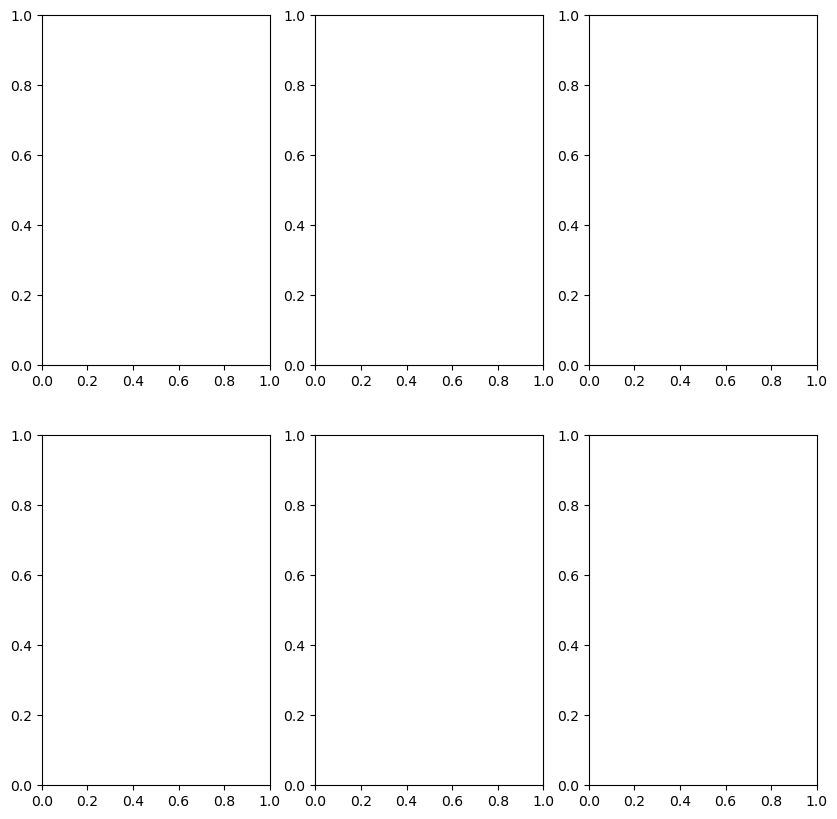

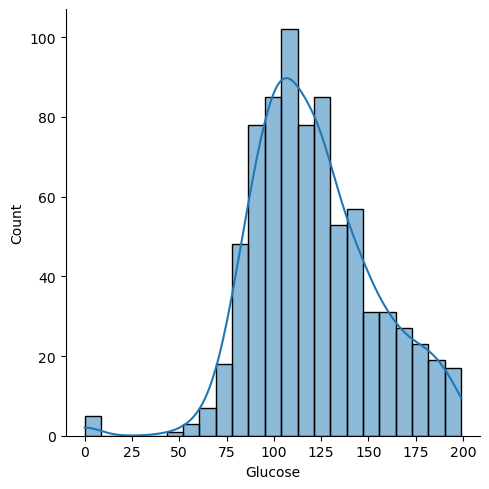

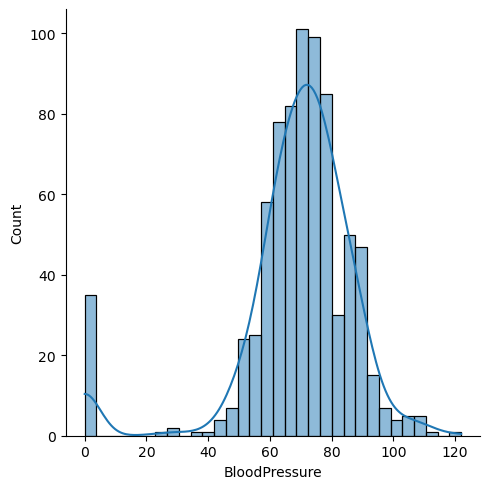

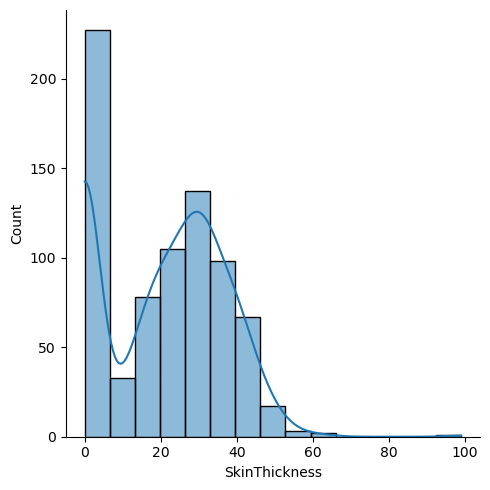

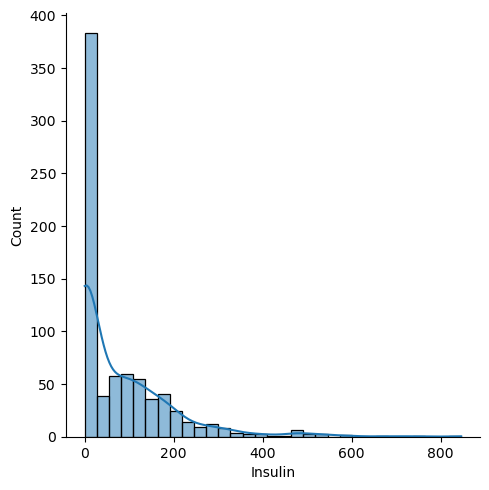

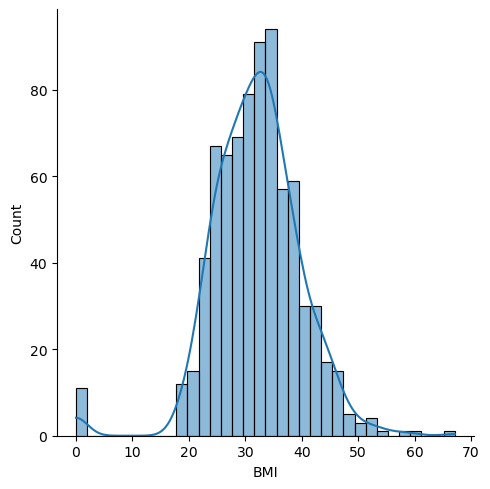

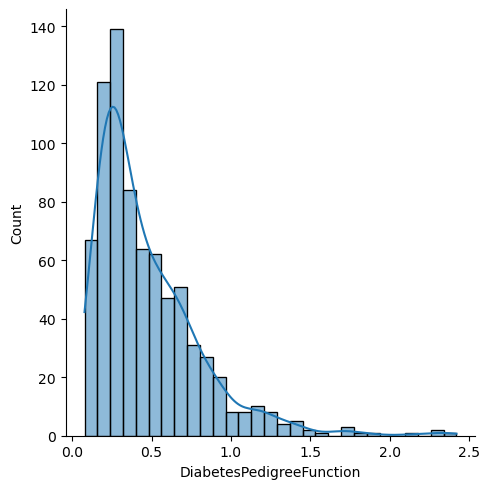

In [6]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

fig_subobj,axes=plt.subplots(2,3, figsize=(10,10))

for i, col in enumerate(cols):
    row=i//3
    column=i%3
    seaborn.displot(diabetes_df[col],kde=True, ax=axes[row,column]) # all six have zero outliers need to switch with median
plt.show()




In [7]:
for col in cols:
    print(f'Number of zeroes in {col}:', (diabetes_df[diabetes_df[col]==0]).value_counts().sum())

Number of zeroes in Glucose: 5
Number of zeroes in BloodPressure: 35
Number of zeroes in SkinThickness: 227
Number of zeroes in Insulin: 374
Number of zeroes in BMI: 11
Number of zeroes in DiabetesPedigreeFunction: 0


In [8]:
for col in cols:
    diabetes_df[col]=diabetes_df[col].replace(0,diabetes_df[col].median())
    

In [9]:
for col in cols:
    print(f'Number of zeroes in {col}:', (diabetes_df[diabetes_df[col]==0]).value_counts().sum())

Number of zeroes in Glucose: 0
Number of zeroes in BloodPressure: 0
Number of zeroes in SkinThickness: 0
Number of zeroes in Insulin: 0
Number of zeroes in BMI: 0
Number of zeroes in DiabetesPedigreeFunction: 0


In [10]:
X=diabetes_df.iloc[:,:8]
Y=diabetes_df.iloc[:,8:]

SScaler=StandardScaler()
X=SScaler.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=7)


In [17]:
def model_results(model,Y_pred, Y_prob,class1_prob):
    print('accuracy score:', accuracy_score(Y_test,Y_pred))
    print('roc_auc_score is:', round(roc_auc_score(Y_test,class1_prob),5)) 
    scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True,figsize=(7,5))
    scikitplot.estimators.plot_learning_curve(model,X_train,Y_train,figsize=(7,5))
    scikitplot.metrics.plot_roc_curve(Y_test,Y_prob,curves=['each_class'],figsize=(7,5))
    
    
    
    
    

accuracy score: 0.7727272727272727
roc_auc_score is: 0.86508


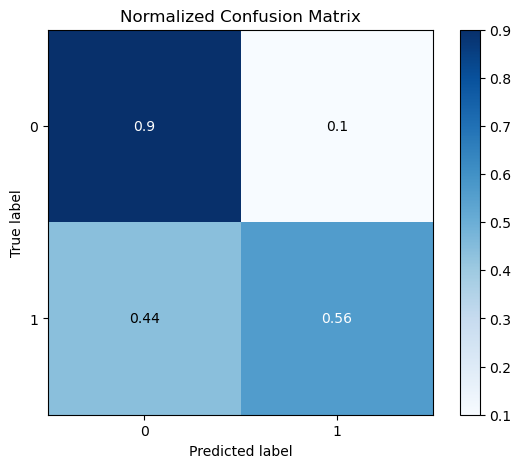

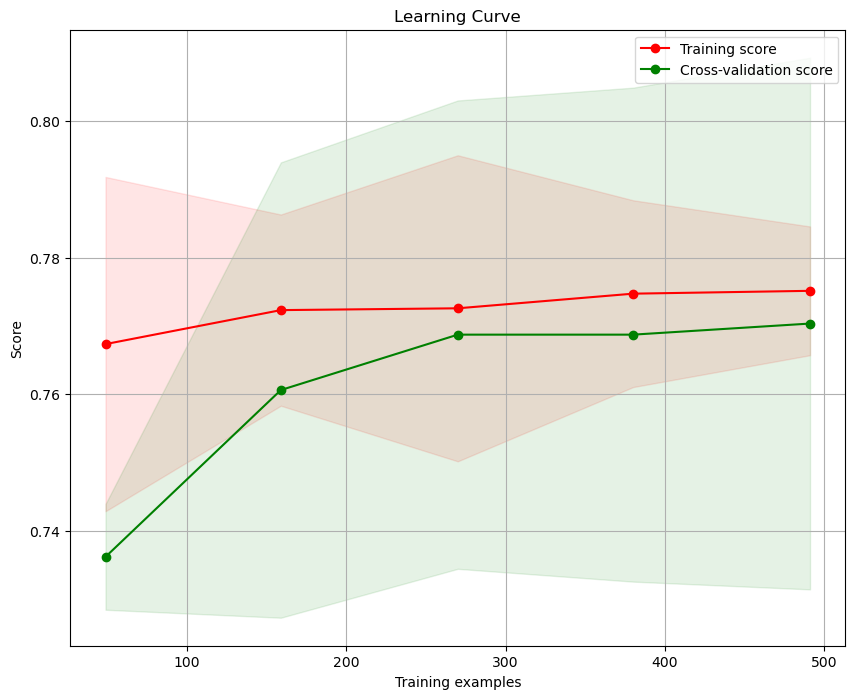

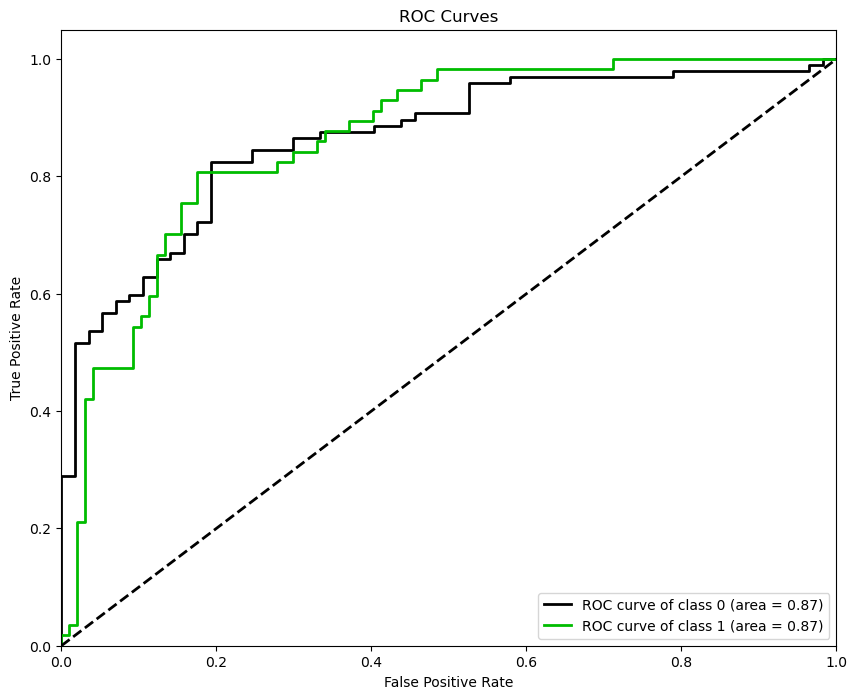

In [22]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)
Y_prob=logistic_regression.predict_proba(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(logistic_regression,Y_pred,Y_prob,class1_prob)



accuracy score: 0.7922077922077922
roc_auc_score is: 0.86598


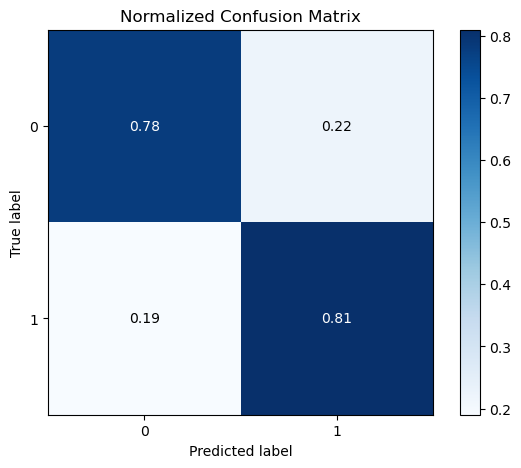

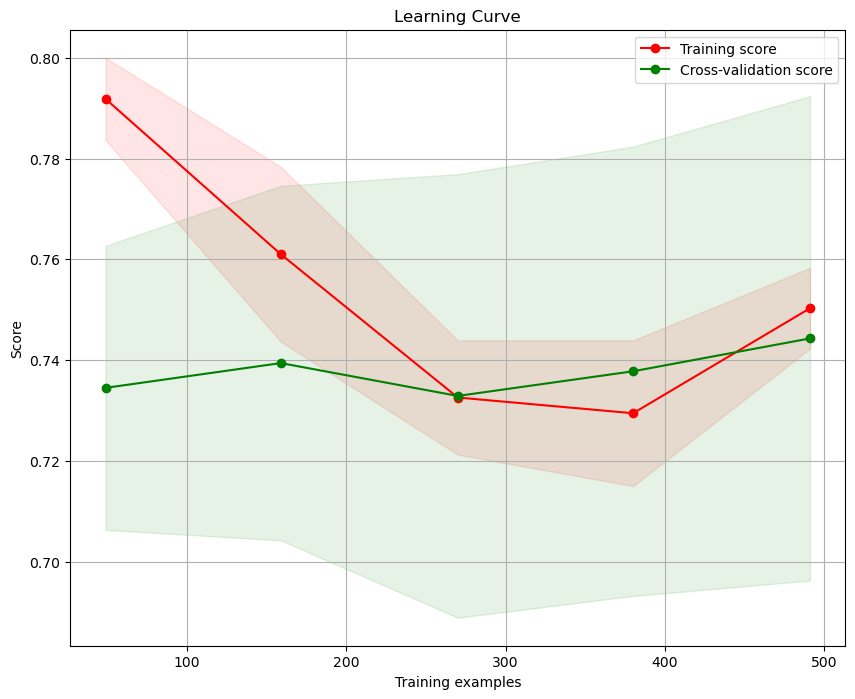

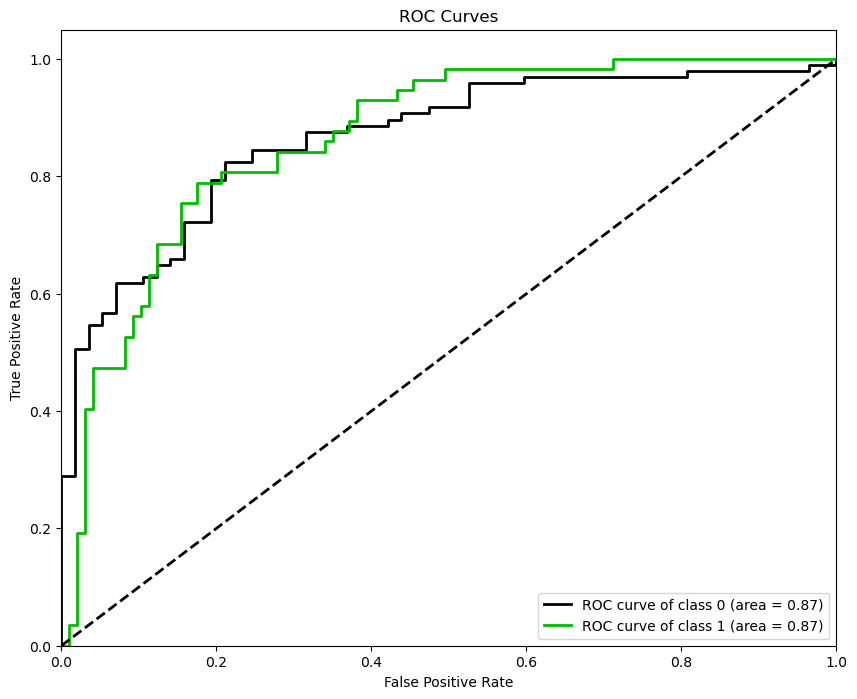

In [24]:
logistic_regression1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced')
logistic_regression1.fit(X_train,Y_train)
Y_pred=logistic_regression1.predict(X_test)
Y_prob=logistic_regression1.predict_proba(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(logistic_regression1,Y_pred,Y_prob,class1_prob)


accuracy score: 0.8116883116883117
roc_auc_score is: 0.86598


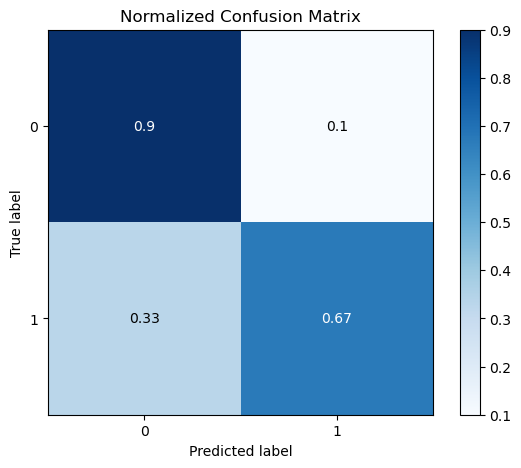

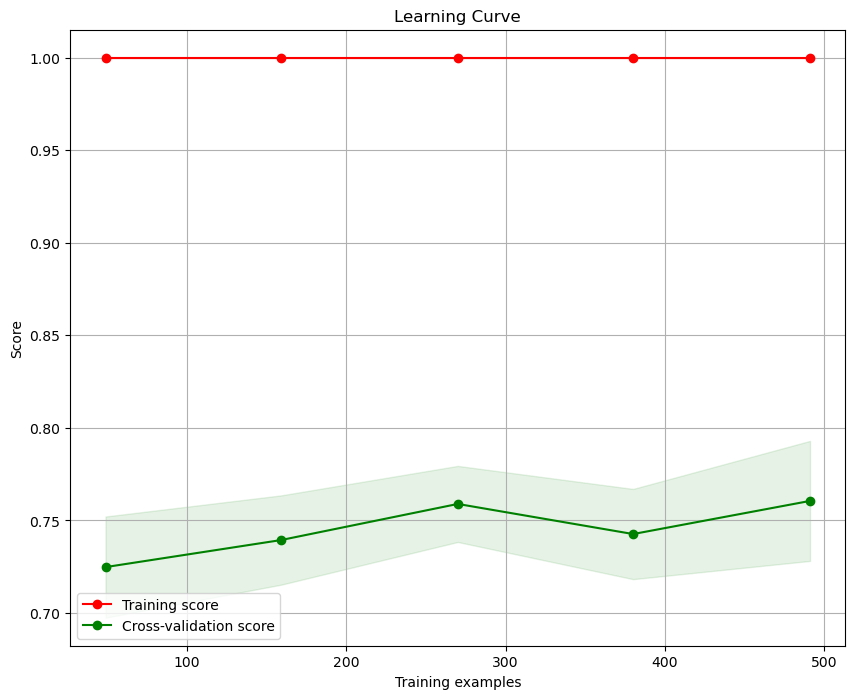

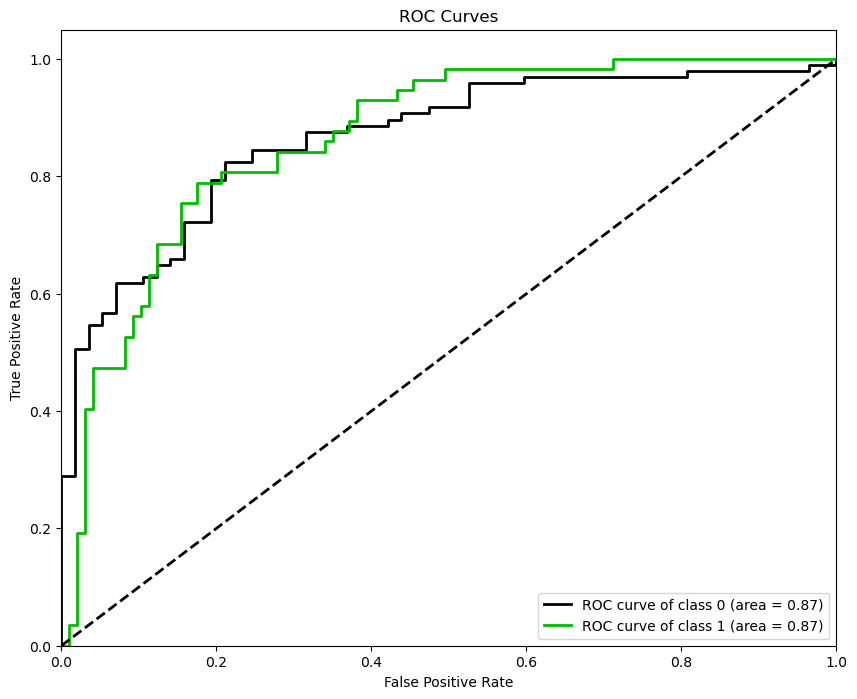

In [25]:
Randomforest=RandomForestClassifier()
Randomforest.fit(X_train,Y_train)
Y_pred=Randomforest.predict(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(Randomforest,Y_pred,Y_prob,class1_prob)

accuracy score: 0.7662337662337663
roc_auc_score is: 0.86598


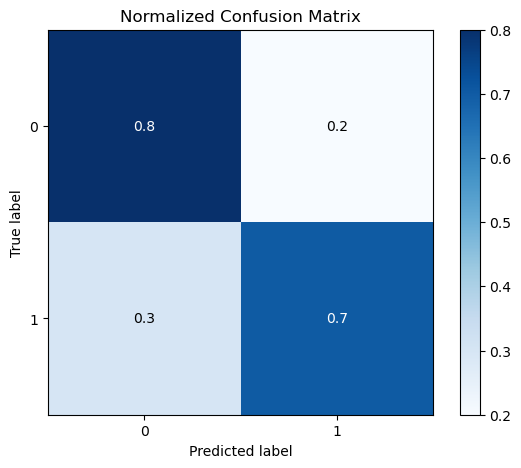

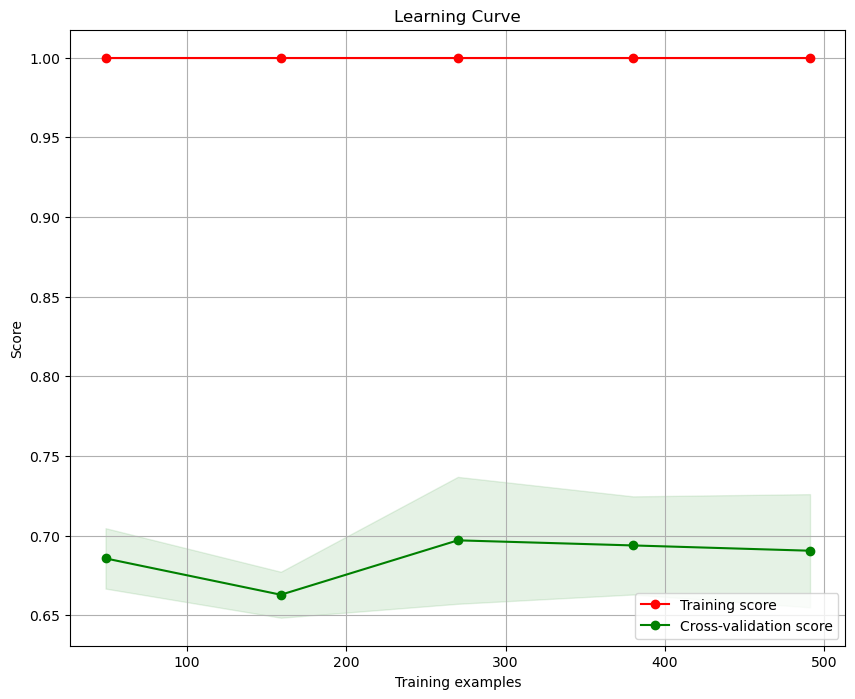

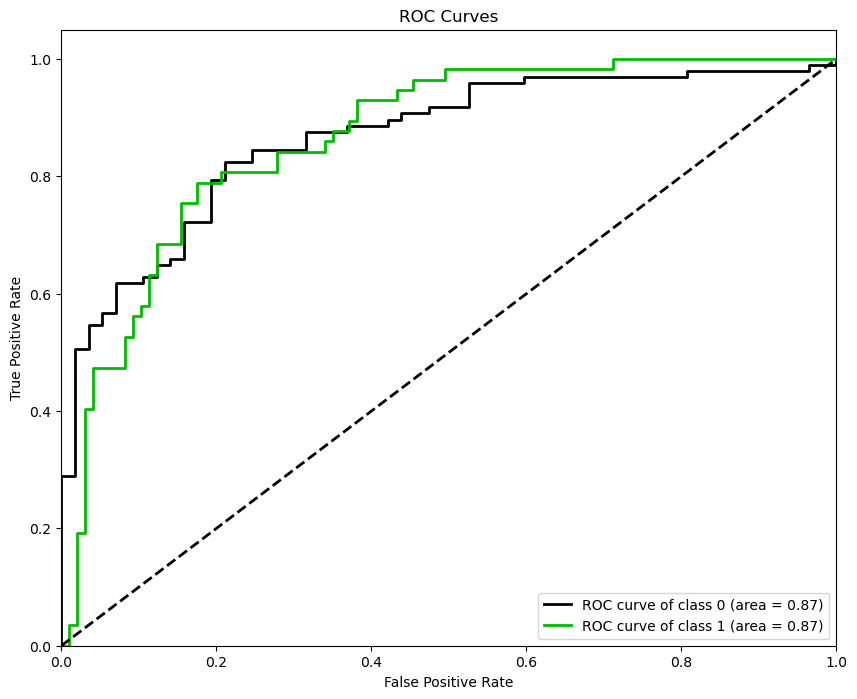

In [26]:
Decision_tree=DecisionTreeClassifier()
Decision_tree.fit(X_train,Y_train)
Y_pred=Decision_tree.predict(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(Decision_tree,Y_pred,Y_prob,class1_prob)


accuracy score: 0.7467532467532467
roc_auc_score is: 0.86598


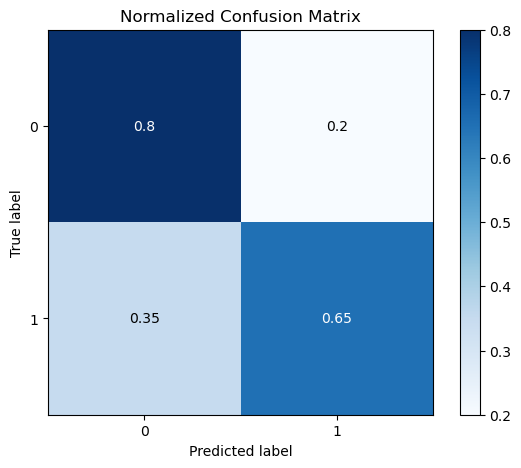

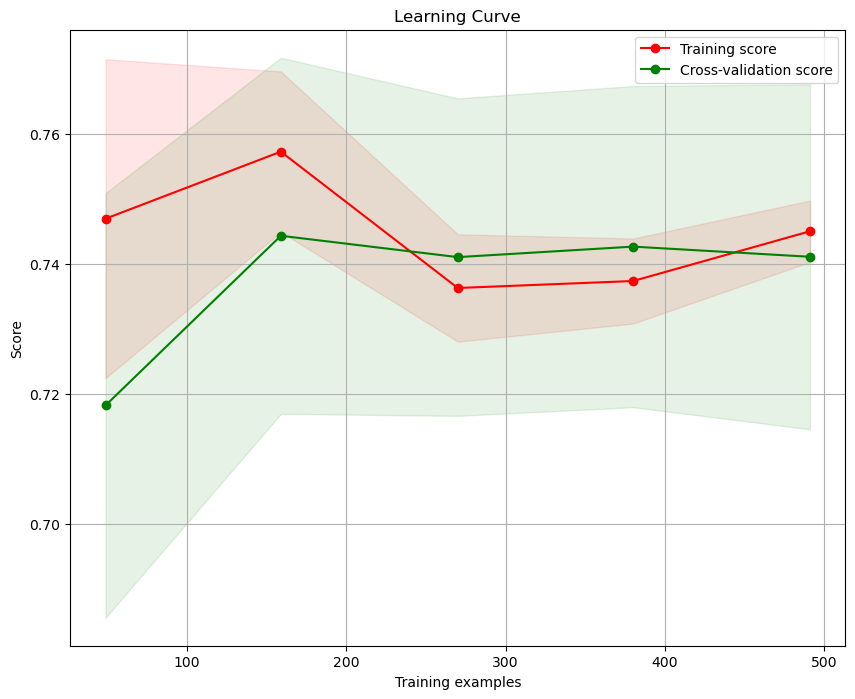

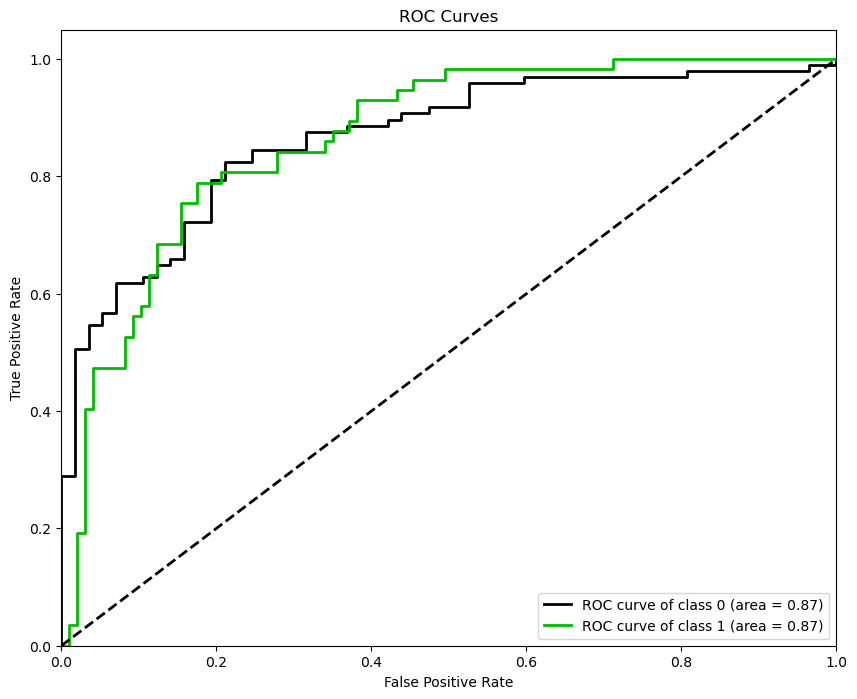

In [27]:
Gaus=GaussianNB()
Gaus.fit(X_train,Y_train)
Y_pred=Gaus.predict(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(Gaus,Y_pred,Y_prob,class1_prob)

accuracy score: 0.7337662337662337
roc_auc_score is: 0.86598


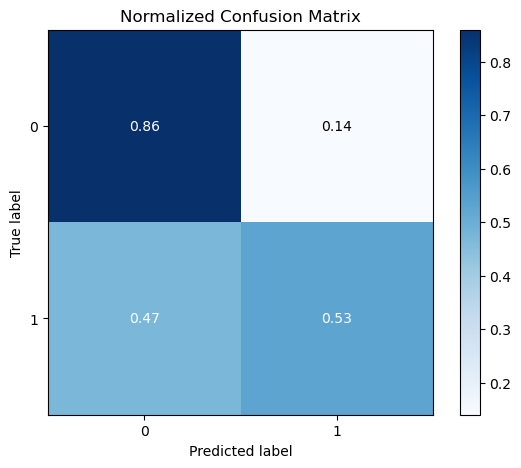

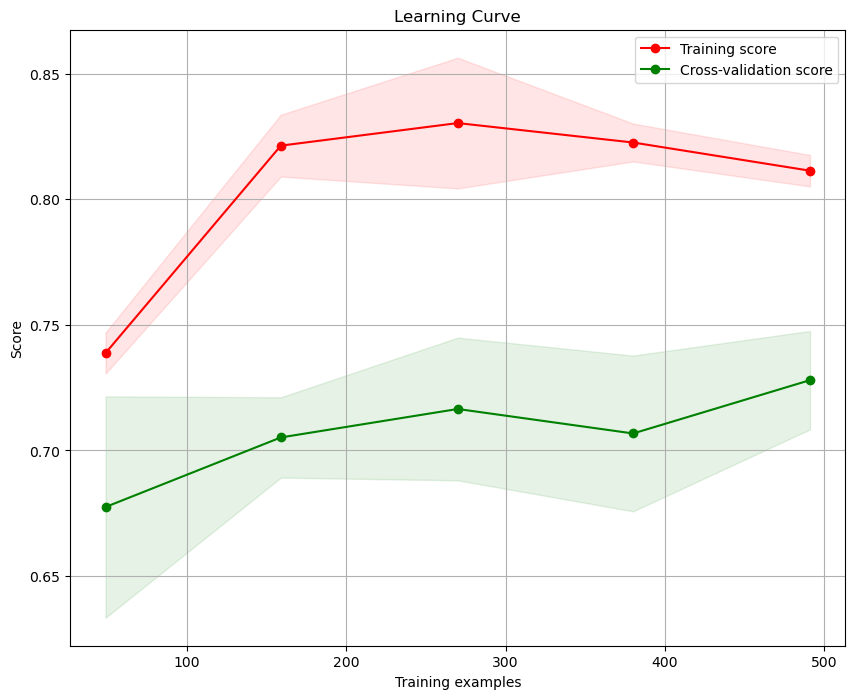

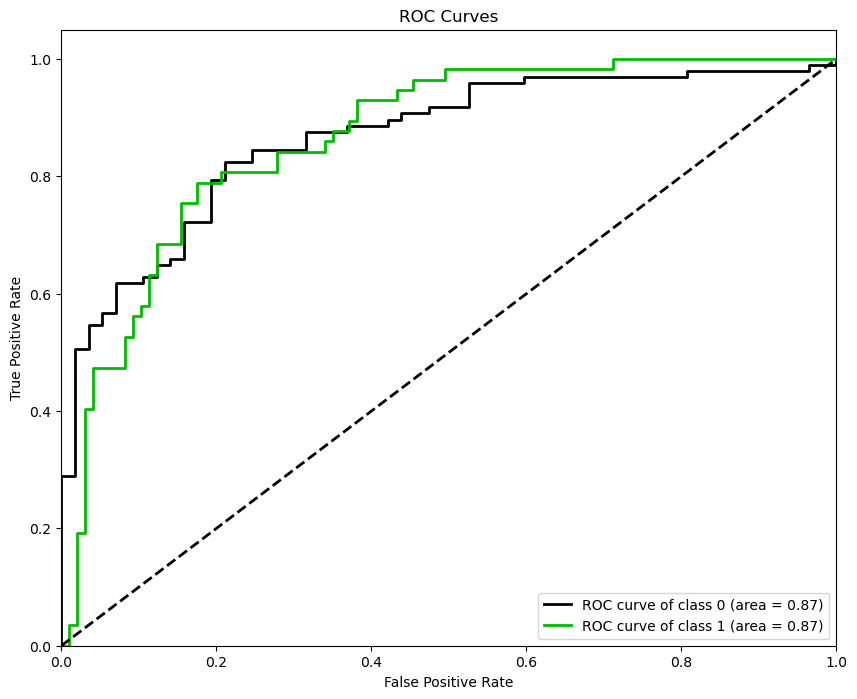

In [28]:
Knbrs=KNeighborsClassifier()
Knbrs.fit(X_train,Y_train)
Y_pred=Knbrs.predict(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(Knbrs,Y_pred,Y_prob,class1_prob)

accuracy score: 0.8376623376623377
roc_auc_score is: 0.86598


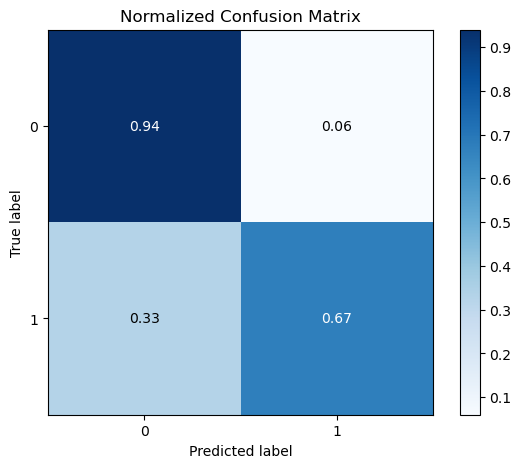

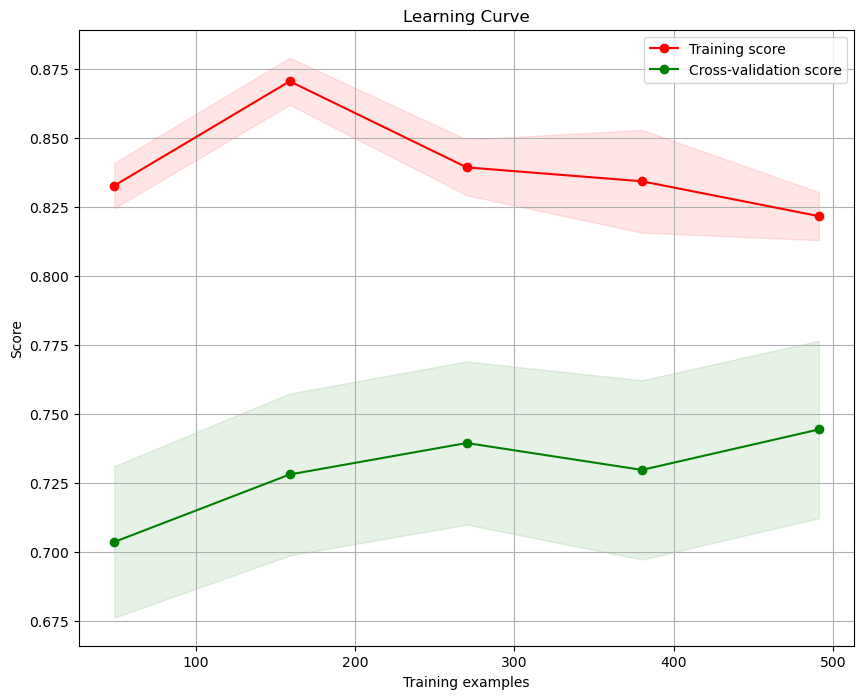

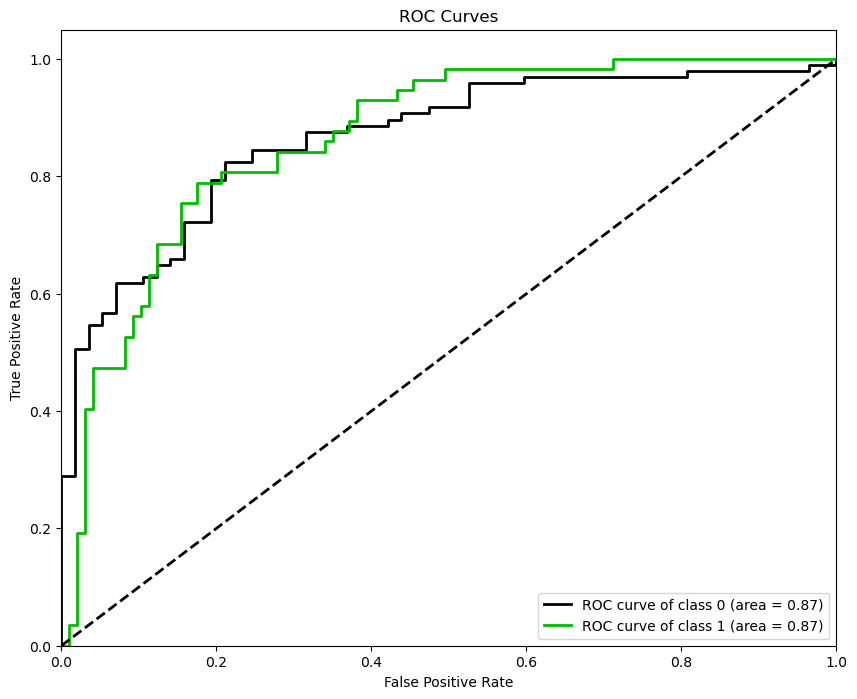

In [29]:
Decision_svc=SVC(kernel='rbf')
Decision_svc.fit(X_train,Y_train)
Y_pred=Decision_svc.predict(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(Decision_svc,Y_pred,Y_prob,class1_prob)

accuracy score: 0.8116883116883117
roc_auc_score is: 0.86598


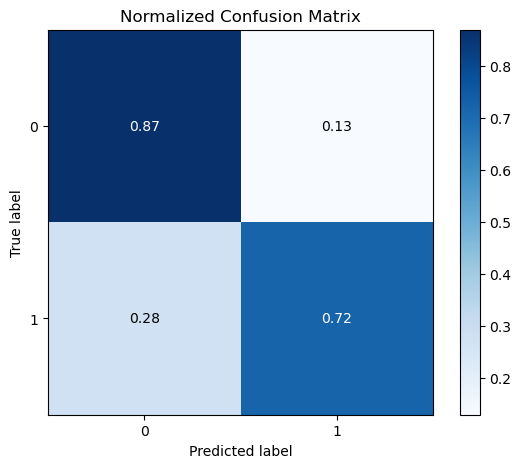

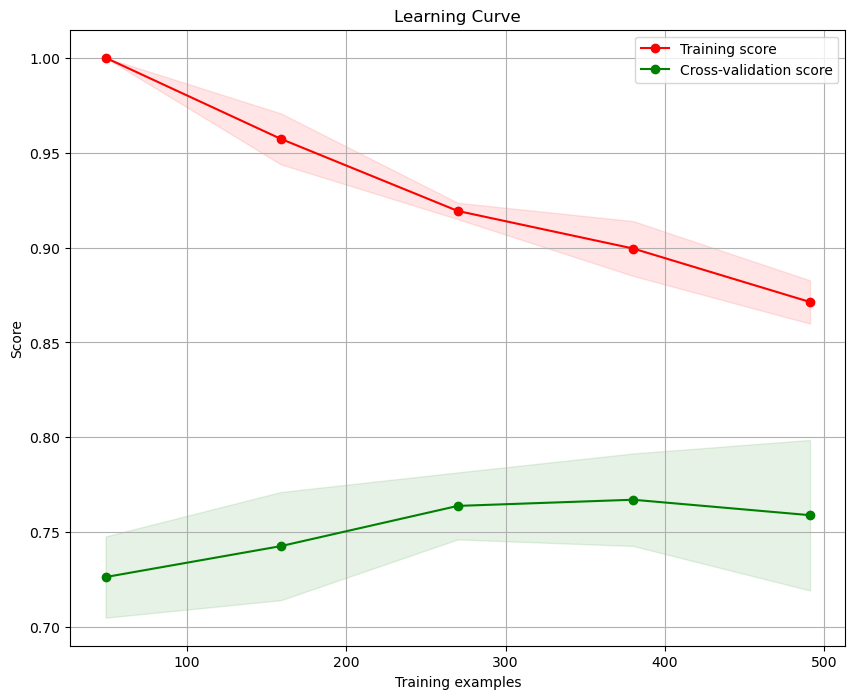

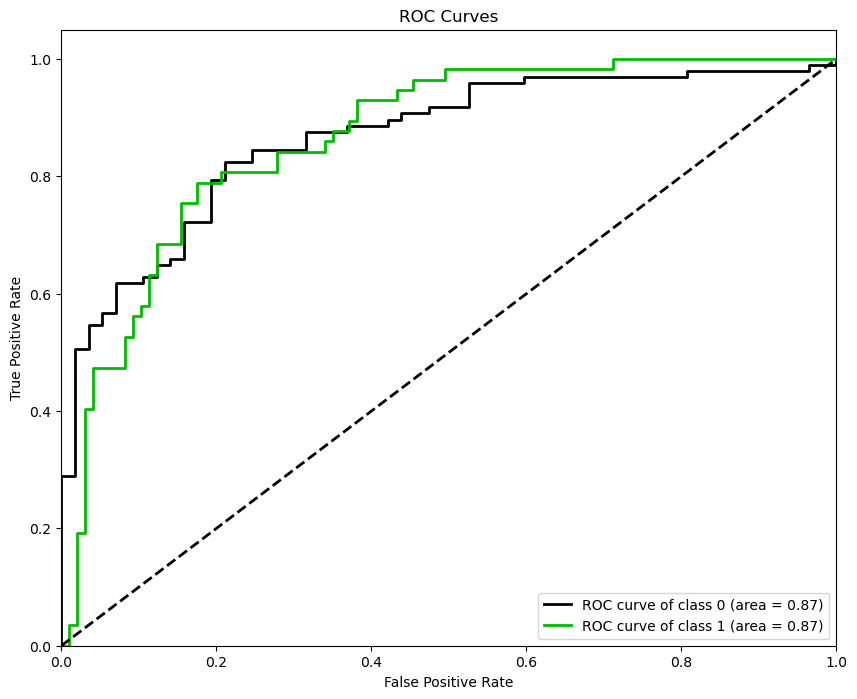

In [38]:
Randomforest1=RandomForestClassifier(max_depth=5, n_estimators=100, max_features=8)
Randomforest1.fit(X_train,Y_train)
Y_pred=Randomforest1.predict(X_test)
class1_prob=list()
for i in Y_prob:
    class1_prob.append(i[1])

model_results(Randomforest1,Y_pred,Y_prob,class1_prob)